Thực hành 2: Ảnh kỹ thuật số & màu

1.Viết chương trình xử lý điểm ảnh

1.1 Biến đổi cường độ ảnh

[[116 116 116 ... 112 111 111]
 [116 116 116 ... 111 111 110]
 [116 116 116 ... 111 110 110]
 ...
 [ 59  58  59 ... 112 112 112]
 [ 59  58  59 ... 112 112 112]
 [ 59  58  59 ... 112 112 112]]


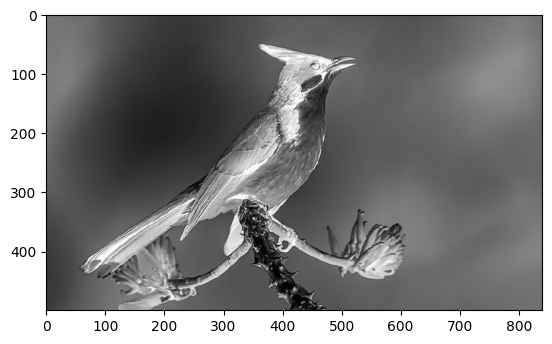

In [4]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('bird.jpg').convert('L')

# Convert image to ndarray
im_1 = np.asarray(img)

# Inversion operation
im_2 = 255 - im_1

# Convert im_2 from ndarray back to image
print(im_2)
new_img = Image.fromarray(im_2)

# Show using PIL
img.show()

# Show using matplotlib
plt.imshow(new_img, cmap='gray')
plt.show() 

1.2Thay đổi chất lượng ảnh với Power law

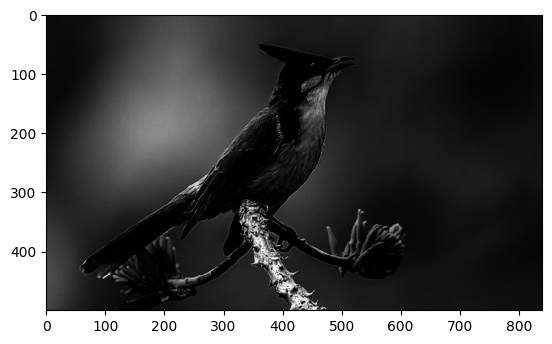

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# mở ảnh đen trắng
img = Image.open('bird.jpg').convert('L')
# đảo ảnh dạng ‘L’ sang 1 mảng số (matrix)
im_1 = np.asarray(img)
# gamma ban đầu
gamma = 5
# chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# tìm giá trị lớn nhất trong b1
b2 = np.max(b1)
# chuẩn hóa b1 (tức là chuyển các giá trị b1 về thuộc khoảng [0,1])
b3 = (b1+1)/b2
# tính tương quan hàm mũ gamma
b4 = np.log(b3) * gamma
# tính tương quan gamma và quy về khoảng [0, 255]
c = np.exp(b4)*255.0
# chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
plt.imshow(d, cmap = 'gray')
plt.show()


1.3Thay đổi cường độ điểm ảnh với Log Transformation

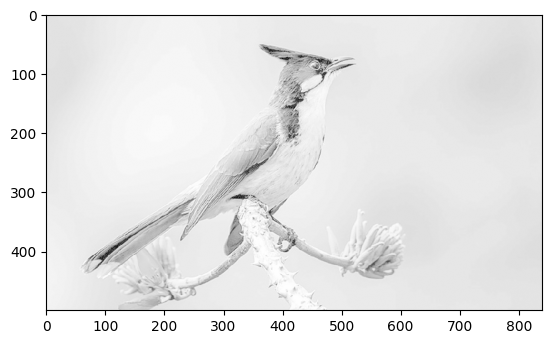

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.jpg').convert('L')

#convert image i into an ndarray
im_1 = np.asarray(img)
gamma = 0.5
#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#performing the log transformation
c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

#c1 is converted to type int
c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap = "gray")
plt.show()


1.4.Histogram equalization

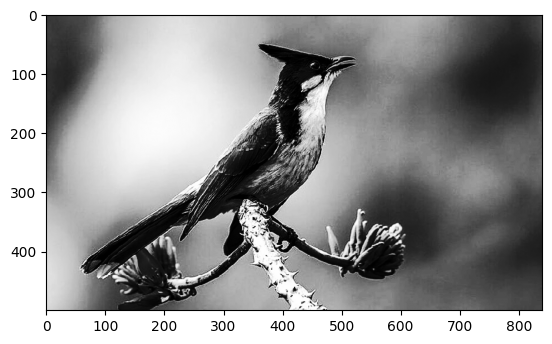

In [9]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.jpg').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = im1.flatten()

#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

#places where cdf=0 is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

#the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

#cdf values are assigned in the flattened array
im2 = cdf[b1]

#size is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2, im1.shape)

#converting im3 to an image
im4 = Image.fromarray(im3)

#img.show()
#im4.show()
plt.imshow(im4, cmap = 'gray')
plt.show()


1.5.Thay đổi ảnh Contrast Stretching

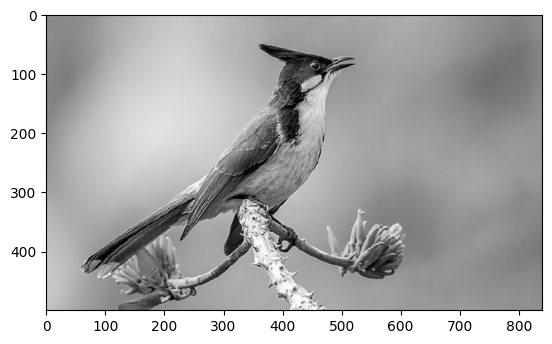

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# open a grayscale image
img = Image.open('bird.jpg').convert('L')
# convert image into an ndarray
iml = np.asarray(img)

# finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()

# converting iml to float
c = iml.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)

# convert from ndarray to image
im3 = Image.fromarray(im2)
im3.show()
plt.imshow(im3)
plt.show()

1.6.Biến đổi Fourier

1.6.1.Biến đổi ảnh Fast Fourier

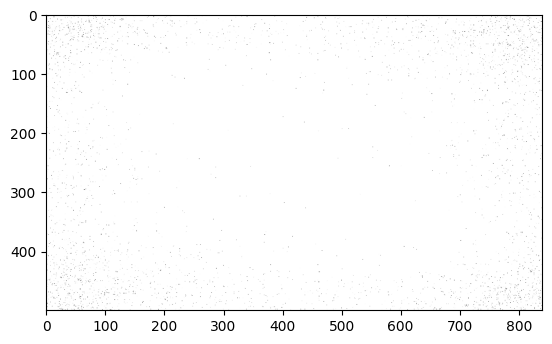

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# open a grayscale image
img = Image.open('bird.jpg').convert('L')
# convert image into an ndarray
iml = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency
d = scipy.fftpack.fftshift(c)

# d is converted from ndarray to image
im3 = Image.fromarray(d)
im3.show()
plt.imshow(im3)
plt.show()

1.6.2.Lọc ảnh trong miền tần suất

Butterworth Lowpass Filter

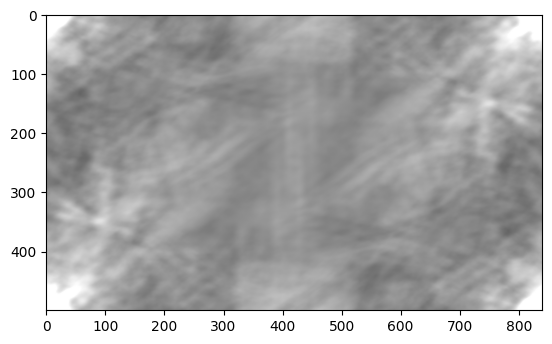

In [21]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.jpg').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

#performing FFT
c = abs(scipy.fftpack.fft2(im1))

#shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = N/2
d_0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
#defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        #using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i,j] = 1 / (1 + (r/d_0)**(2*t1))

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

#performing the convolution
con = d * H

#computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

Butterworth highpass Filter

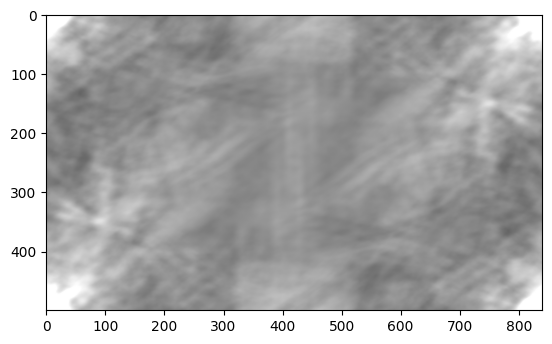

In [22]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.jpg').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

#performing FFT
c = abs(scipy.fftpack.fft2(im1))

#shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = N/2
d_0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
#defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        #using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i,j] = 1 / (1 + (r/d_0)**t2)

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

#performing the convolution
con = d * H

#computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

2.Bài tập

1.Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau: 


I: Image Inverse
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching


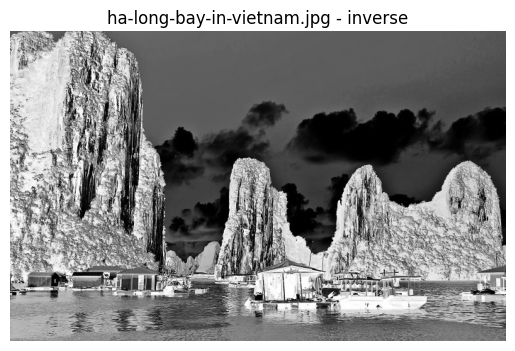

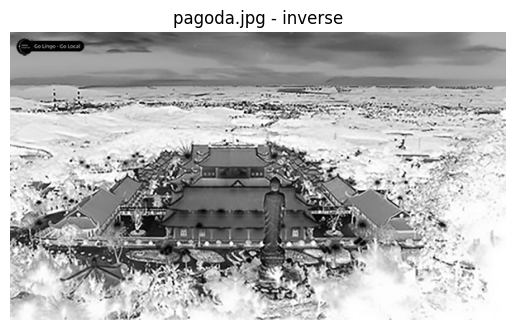

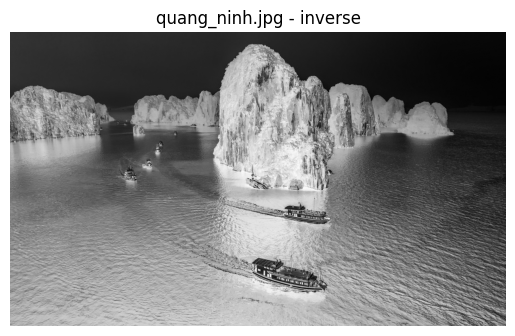

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def img_inv_func(img):
    im_1 = np.asarray(img)
    im_2 = 255 - im_1
    return Image.fromarray(im_2)

def gamma_corr_func(img, gamma=0.5):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    b3 = (b1 + 1) / b2
    b4 = np.log(b3) * gamma
    c = np.exp(b4) * 255.0
    c1 = c.astype(np.uint8)
    return Image.fromarray(c1)

def log_transform_func(img):
    b1 = np.asarray(img).astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    return Image.fromarray(c1)

def hist_eq_func(img):
    im1 = np.asarray(img)
    b1 = im1.flatten()
    hist, bins = np.histogram(im1, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf, 0).astype('uint8')
    im2 = cdf[b1]
    im3 = np.reshape(im2, im1.shape)
    return Image.fromarray(im3)

def contrast_stretch_func(img):
    im1 = np.asarray(img)
    a = im1.min()
    b = im1.max()
    c = im1.astype(float)
    im2 = 255 * (c - a) / (b - a)
    return Image.fromarray(im2.astype(np.uint8))

def apply_transformation(func, folder, save_folder, name_suffix):
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder, filename)
            img = Image.open(path).convert('L')
            result = func(img)
            plt.imshow(result, cmap='gray')
            plt.title(f"{filename} - {name_suffix}")
            plt.axis('off')
            plt.show()
            result.save(os.path.join(save_folder, f"{os.path.splitext(filename)[0]}_{name_suffix}.png"))

os.makedirs("result", exist_ok=True)

print("I: Image Inverse")
print("G: Gamma Correction")
print("L: Log Transformation")
print("H: Histogram Equalization")
print("C: Contrast Stretching")

choice = input("Nhập(I, G, L, H, C): ").upper()
folder = "exercise"

if choice == 'I':
    apply_transformation(img_inv_func, folder, "result", "inverse")
elif choice == 'G':
    apply_transformation(gamma_corr_func, folder, "result", "gamma")
elif choice == 'L':
    apply_transformation(log_transform_func, folder, "result", "log")
elif choice == 'H':
    apply_transformation(hist_eq_func, folder, "result", "hist")
elif choice == 'C':
    apply_transformation(contrast_stretch_func, folder, "result", "contrast")
else:
    print("Không hợp lệ.")